# Steps in Data Preprocessing
Here are the steps I have followed;
1. Import libraries
2. Read data
3. Checking for missing values
4. Checking for categorical data
5. Standardize the data
6. PCA transformation
7. Data splitting
8. Model Building
9. Model Evaluation

# 1. Import libraries

- **Pandas**: For data manipulation and analysis.
- **NumPy**: Fundamental for scientific computing.
- **time**: Used for time-based operations.
- **Matplotlib** & **Seaborn**: Employed for data visualization.
- **Scikit-learn**: Applied for data preprocessing and machine learning algorithms.

In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import time

# Visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, roc_curve
!pip install joblib
import joblib  # Updated import for joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Read data


In [ ]:
# Read the data in the CSV file using pandas
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

# 3. Checking for missing values


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dropna(inplace=True)

The dataset is labeled as 0s and 1s. 0 = non fraud and 1 = fraud.


In [ ]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


<ipython-input-15-41db665b30ad>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

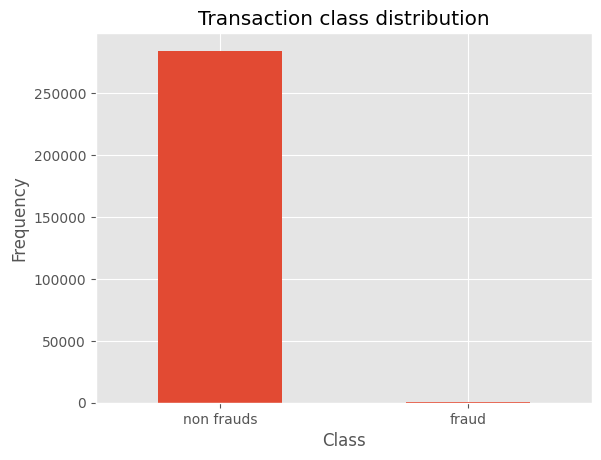

In [ ]:
# Plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

# 4. Checking for categorical data

The dataset’s only categorical variable is the target. All other features are in numerical format, eliminating the need for conversion to categorical data.


**Plot the distribution of features**

The distribution of features is visualized using Seaborn's distplot(). The dataset includes 30 features and a target variable.


<ipython-input-16-e1ae5d6645f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount)


<Axes: ylabel='Density'>

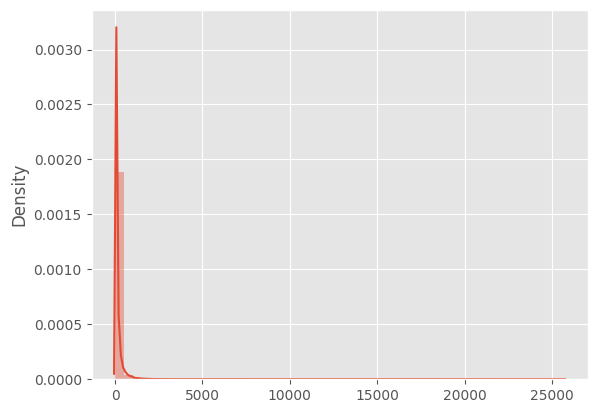

In [ ]:
# Distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

<ipython-input-17-51b5443e99e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time)


<Axes: ylabel='Density'>

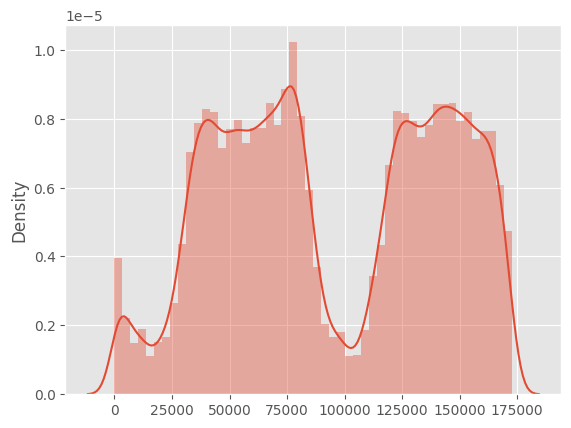

In [ ]:
# distribution of Time
time = df['Time'].values
sns.distplot(time)

<ipython-input-18-4f51e33f36e4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 1], bins=50)
<ipython-input-18-4f51e33f36e4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 0], bins=50)
<ipython-input-18-4f51e33f36e4>:8: UserWarning: 

`distplot` is a depr

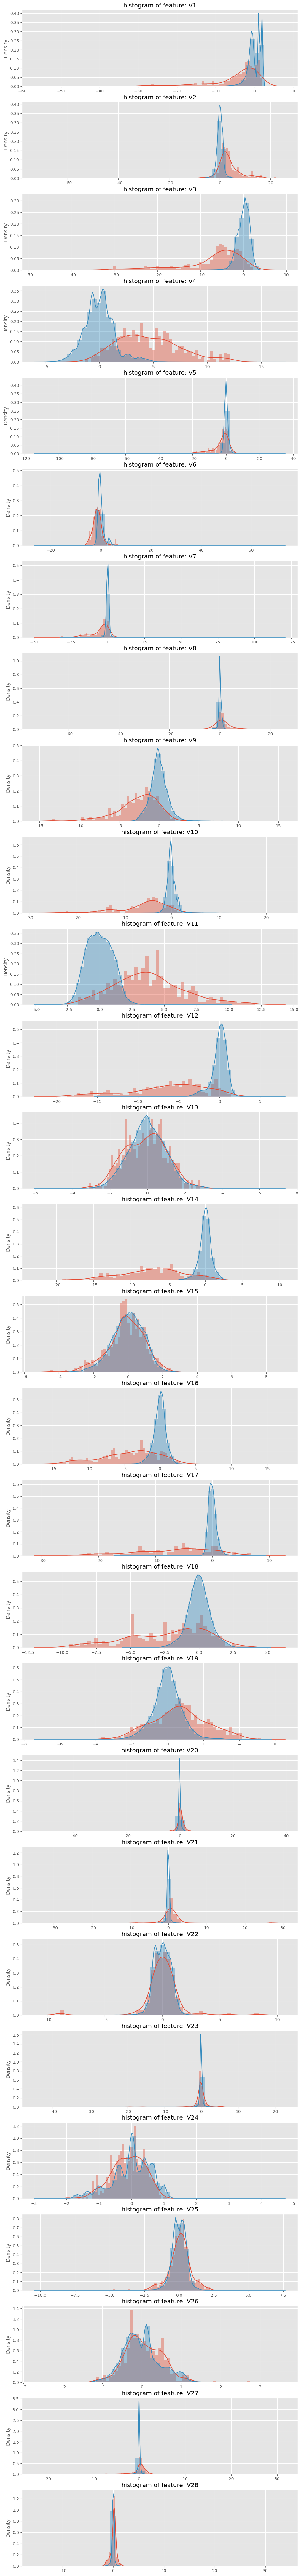

In [ ]:
# Distribution of anomalous features
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

# 5. Standardize the data

The dataset includes only numerical input variables, transformed via PCA.

Features V1 to V28 are the principal components from PCA; Time and Amount were not PCA-transformed.

PCA is sensitive to scale, so feature scaling is required.

Scikit-learn’s StandardScaler() is used to standardize the features.



In [ ]:
# Standardizing the features
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Now all the features are standardize into unit scale




# 6. PCA transformation

**PCA (Principal Component Analysis):**

Primarily used to reduce the dimensionality of the feature space while preserving as much information as possible.

In this case, all features have been transformed into 2 principal components using PCA.




In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,-1.571678,0.675572,0
1,1.086213,0.282673,0
2,-2.053411,-1.077634,0
3,-1.150107,0.427442,0
4,-1.143820,1.341999,0



The dataset contains a total of 284,807 transactions, with only 0.17% (approximately 484 transactions) being fraudulent, which poses challenges for classification algorithms.

To address this imbalance, only 492 rows from the non-fraudulent transactions are selected to balance the dataset.


In [ ]:
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
261056,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,-2.223070,...,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,1,-0.171276,1.369400
284024,-2.887924,0.132729,0.700439,4.899127,-0.374269,1.117871,0.101110,1.067368,-1.919180,1.007447,...,-1.393423,-0.062084,0.630838,0.025986,0.033849,0.327804,-0.205488,0,0.629620,1.627254
263080,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,...,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1,-0.349231,1.389342
237246,-1.570050,-1.228219,0.061959,0.845268,0.147554,2.932224,1.425199,0.101334,0.173186,0.112795,...,1.388004,0.059947,-0.914908,-0.943542,-0.457216,0.126144,0.196732,0,1.637818,1.144312
270339,0.366712,2.132300,-0.766807,4.713684,1.137016,0.185936,0.564262,0.186492,-1.760672,1.223710,...,-0.992471,0.126658,-0.730882,-0.674936,0.060786,0.407053,0.126717,0,-0.349631,1.457548


<ipython-input-24-d733f9397b8a>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(new_df['Class'], sort = True)


Text(0, 0.5, 'Frequency')

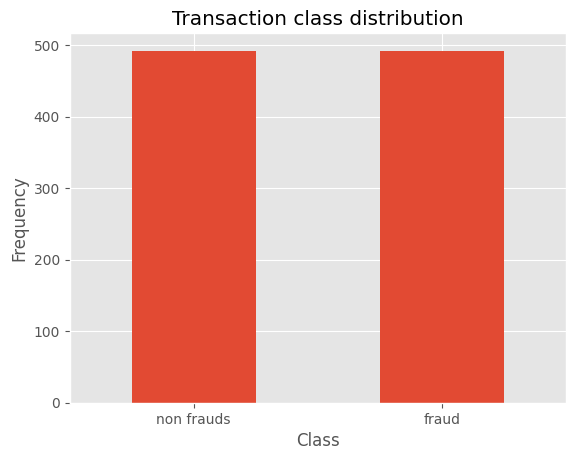

In [ ]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [ ]:
# prepare the data
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

# 7. Data splitting

In [ ]:
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)

[link text](https://)# 8. Model Building

For model building, K-Nearest Neighbors (KNN) is used. To achieve optimal performance, it is essential to find the best value of K, which determines the number of neighbors considered in the classification process.

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

    #Fit the model
    knn.fit(X_train,y_train.ravel())

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

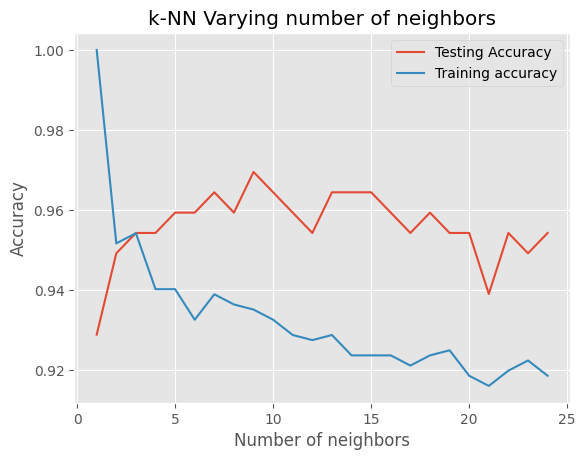

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [ ]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=9)

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']

In [ ]:
# load the model from disk
knn = joblib.load(filename)

# 9. Model Evaluation

In [ ]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

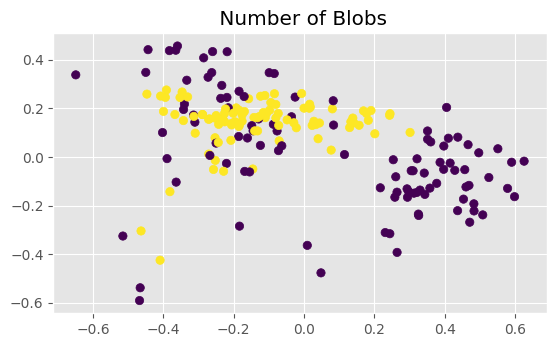

In [ ]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [ ]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [ ]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9695431472081218
Precison --> 0.978494623655914
Recall --> 0.9578947368421052
F1 --> 0.9680851063829787
MCC --> 0.9391595836101646
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       102
           1       0.98      0.96      0.97        95

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



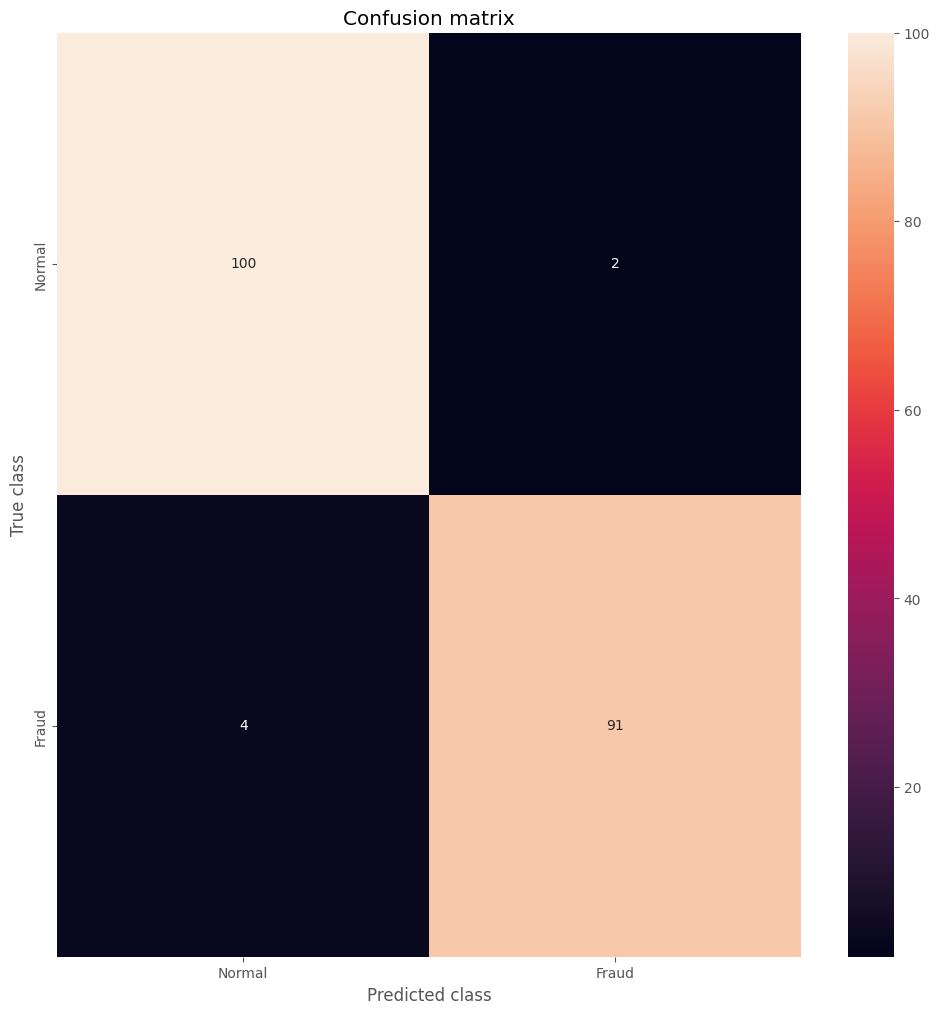

In [ ]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()